In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data=pd.read_csv("Book1.csv")
data.head()

,Unnamed: 0,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196
1,1,2.4,221
2,2,1.5,138
3,3,3.5,255
4,4,3.5,244


In [10]:
data=data[["ENGINESIZE","CO2EMISSIONS"]]

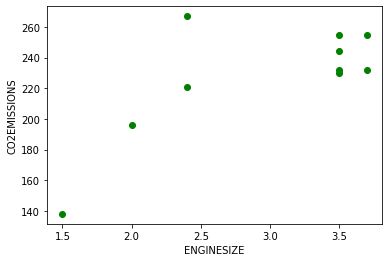

In [12]:
plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"],color="green")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [14]:
train=data[:(int((len(data)*0.8)))]
test=data[(int((len(data)*0.2))):]

In [15]:
from sklearn import linear_model

In [23]:
regr=linear_model.LinearRegression()
train_x=np.array(train[["ENGINESIZE"]])
train_y=np.array(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print("coefficients : ",regr.coef_)
print("Intercept : ",regr.intercept_)

coefficients :  [[38.32677165]]
Intercept :  [105.43602362]


Text(0, 0.5, 'Emission')

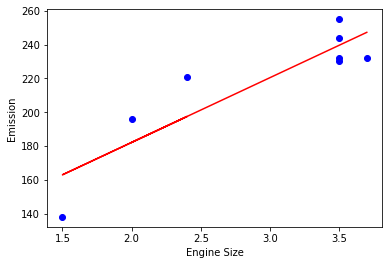

In [25]:
plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"],color="blue")
plt.plot(train_x,regr.coef_*train_x+regr.intercept_,color="red")
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [27]:
def get_regression_predictions(input_features,intercept,slope):
  predicted_values=input_features*slope+intercept
  return predicted_values

In [28]:
my_engine_size=1
estimated_emission=get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print("estimated Emission :",estimated_emission)

estimated Emission : 143.76279527559058


In [31]:
from sklearn.metrics import r2_score
test_x=np.array(test[["ENGINESIZE"]])
test_y=np.array(test[["CO2EMISSIONS"]])
test_y_=regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ -test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_,test_y))


Mean absolute error: 19.31
Mean sum of squares (MSE): 770.22
R2-score: 0.04
